In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
mouse_drug_data_to_load = "C:/Users/hello/Desktop/Matplotlib homework/mouse_drug_data.csv"
clinical_trial_data_to_load = "C:/Users/hello/Desktop/Matplotlib homework/clinicaltrial_data.csv"

In [33]:
mouse_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
#clinical_data.head()
mouse_data.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [7]:
merged_data = pd.merge(clinical_data, mouse_data,how = "left", on = ["Mouse ID"])
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [8]:
grouped_merged_data = merged_data.groupby(["Drug","Timepoint"])

In [9]:
#Mean Tumor Volume Data Grouped by Drug and Timepoint 

Tumor_mean = grouped_merged_data["Tumor Volume (mm3)"].mean()
Mean_Tumor_Volume_df = pd.DataFrame({"Tumor Volume (mm3)" : Tumor_mean})
Mean_Tumor_Volume_df = Mean_Tumor_Volume_df.reset_index()
Mean_Tumor_Volume_df.head()



,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [10]:
Tumor_sem = grouped_merged_data["Tumor Volume (mm3)"].sem()
Sem_Tumor_Volume_df = pd.DataFrame({"Tumor Volume (mm3)" : Tumor_sem})
#Sem_Tumor_Volume_df.head(20)
Sem_Tumor_Volume_df = Sem_Tumor_Volume_df.reset_index()
Sem_Tumor_Volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [11]:
tumor_mean_pivot = Mean_Tumor_Volume_df.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]
tumor_mean_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [12]:
sem_tumor_pivot = Sem_Tumor_Volume_df.pivot(index = "Timepoint",columns = "Drug")["Tumor Volume (mm3)"]
sem_tumor_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


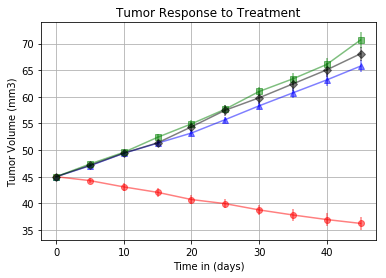

In [23]:
#ax = plt.subplots()
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Capomulin"],yerr = sem_tumor_pivot["Capomulin"], fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Infubinol"],yerr = sem_tumor_pivot["Infubinol"],fmt = '-', marker = '^',color="b",
             alpha = 0.5, label="Infubinol")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Ketapril"],yerr = sem_tumor_pivot["Ketapril"],fmt = '-', marker = 's',color="g",
             alpha = 0.5, label="Ketapril")
plt.errorbar(tumor_mean_pivot.index,tumor_mean_pivot["Placebo"],yerr = sem_tumor_pivot["Placebo"],fmt = '-', marker = 'D',color="black",
             alpha = 0.5, label="Placebo")

#plt.xlim(-0.45, len(tumor_mean_pivot))

plt.title("Tumor Response to Treatment")
plt.xlabel("Time in (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()



In [14]:
#Mean Met. Site Data Grouped by Drug and Timepoint 
grouped_merged_data = merged_data.groupby(["Drug","Timepoint"])
Metastatic_mean = grouped_merged_data["Metastatic Sites"].mean()
Mean_Metastatic_df = pd.DataFrame({"Metastatic Sites" : Metastatic_mean})
Mean_Metastatic_df.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174
          25                 0.818182
          30                 1.090909
          35                 1.181818
          40                 1.380952
          45                 1.476190
Ceftamin  0                  0.000000
          5                  0.380952
          10                 0.600000
          15                 0.789474
          20                 1.111111
          25                 1.500000
          30                 1.937500
          35                 2.071429
          40                 2.357143
          45                 2.692308

In [15]:
mean_metastatic_pivot = Mean_Metastatic_df.pivot_table(index = "Timepoint",columns = "Drug")["Metastatic Sites"]
mean_metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [17]:
Metastatic_sem = grouped_merged_data["Metastatic Sites"].sem()
Sem_Metastatic_df = pd.DataFrame({"Metastatic Sites" : Metastatic_sem})
Sem_Metastatic_df.head(20)

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
          25                 0.181818
          30                 0.172944
          35                 0.169496
          40                 0.175610
          45                 0.202591
Ceftamin  0                  0.000000
          5                  0.108588
          10                 0.152177
          15                 0.180625
          20                 0.241034
          25                 0.258831
          30                 0.249479
          35                 0.266526
          40                 0.289128
          45                 0.286101

In [18]:
sem_metastatic_pivot = Sem_Metastatic_df.pivot_table(index = "Timepoint", columns = "Drug")["Metastatic Sites"]
sem_metastatic_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


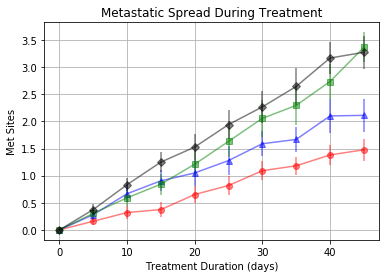

In [21]:
plt.errorbar(mean_metastatic_pivot.index,mean_metastatic_pivot["Capomulin"],yerr = sem_metastatic_pivot["Capomulin"],fmt = '-', marker = 'o',color="r",
             alpha = 0.5, label="Capomulin" )
plt.errorbar(mean_metastatic_pivot.index,mean_metastatic_pivot["Infubinol"],yerr = sem_metastatic_pivot["Infubinol"],fmt = '-',marker = '^',color="b",
             alpha = 0.5, label="Infubinol" )
plt.errorbar(mean_metastatic_pivot.index,mean_metastatic_pivot["Ketapril"],yerr = sem_metastatic_pivot["Ketapril"],fmt = '-',marker = 's',color="g",
             alpha = 0.5, label="Ketapril" )
plt.errorbar(mean_metastatic_pivot.index,mean_metastatic_pivot["Placebo"],yerr = sem_metastatic_pivot["Placebo"],fmt = '-',marker = 'D', color="black",
             alpha = 0.5, label="Placebo"  )

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met Sites")
plt.grid()

In [25]:
#Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grouped_merged_data = merged_data.groupby(["Drug","Timepoint"])
Mice_count = grouped_merged_data["Mouse ID"].count()
Count_mice_df = pd.DataFrame({"Mouse Count" : Mice_count})

Count_mice_df.head(20)

Mouse Count
Drug      Timepoint             
Capomulin 0                   25
          5                   25
          10                  25
          15                  24
          20                  23
          25                  22
          30                  22
          35                  22
          40                  21
          45                  21
Ceftamin  0                   25
          5                   21
          10                  20
          15                  19
          20                  18
          25                  18
          30                  16
          35                  14
          40                  14
          45                  13

In [30]:
Count_mice_pivot = Count_mice_df.pivot_table(index = "Timepoint",columns = "Drug")["Mouse Count"]
Count_mice_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [38]:
Survival_rate = grouped_merged_data["Tumor Volume (mm3)"].count()
#Survival_rate
Survival_rate_df = pd.DataFrame({"Survival Rate(mm3)" : Survival_rate})
#Survival_rate_df
Survival_rate_pivot = Survival_rate_df.pivot_table(index = "Timepoint",columns = "Drug")["Survival Rate(mm3)"]
Survival_rate_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


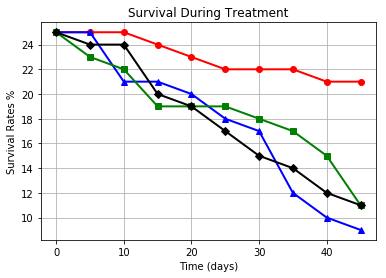

In [47]:
plot = plt.plot(Survival_rate_pivot.index,Survival_rate_pivot["Capomulin"],marker = 'o',color="r",
             linewidth=2, label="Capomulin")
plot = plt.plot(Survival_rate_pivot.index,Survival_rate_pivot["Infubinol"],marker = '^',color="b",
             linewidth=2, label="Infubinol")
plot = plt.plot(Survival_rate_pivot.index,Survival_rate_pivot["Ketapril"],marker = 's',color="g",
             linewidth=2, label="Ketapril")
plot = plt.plot(Survival_rate_pivot.index,Survival_rate_pivot["Placebo"],marker = 'D',color="black",
             linewidth=2, label="Placebo")
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rates %")
plot = plt.grid()
